# 模式识别第一次作业
## (距离分类器与聚类分析)

<img src = assets\38B1DEBF000EB9C361287787B6FEDF05.png width = 40% />

<img src = assets\Snipaste_2022-09-24_15-59-10.jpg width = 60% />


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
MAX_NUM = 999999999

In [30]:
# input
points = np.array([[4,-2,1],
                    [3,-1,1],
                    [3,-3,1],
                    [3,-2,1],
                    [3,0,2],
                    [3,-4,2],
                    [1,-2,2],
                    [0,-1,2]])

In [31]:
def Euclidean_distance(x,y):
    '''
    calculate the Euclidean distance between vector x and y

    Parameters:
        x,y - input vector

    Returns:
        distance between vector x and y
    '''
    distance = 0
    for i in range(x.shape[0]):
        distance = distance + (x[i]-y[i])**2
    return distance**0.5

In [32]:
def nearest_neighbor(point,points):
    #(1)最近邻分类
    min_distance = MAX_NUM
    label = 0
    for i in range(points.shape[0]):
        distance = Euclidean_distance(point,points[i])
        if distance < min_distance:
            label = points[i,2]
            min_distance = distance
    return label


In [33]:
def template_matching(point,points):
    #(2)模板匹配
    template_dict = {}
    min_distance = MAX_NUM
    for i in range(points.shape[0]):
        if points[i,-1] in template_dict.keys():
            template_dict[points[i,-1]] = np.row_stack((template_dict[points[i,-1]],points[i]))
        else:
            template_dict[points[i,-1]] = np.zeros((1,points[i].shape[0])) + points[i]
    for i,key in enumerate(template_dict):
        template = np.average(template_dict[key],axis=0)
        distance = Euclidean_distance(point,template)
        if distance < min_distance:
            label = key
            min_distance = distance
    return label

In [34]:
#(1)
print("The label of (0,0) is {0} in quiz(1)".format(nearest_neighbor(np.array([0,0]),points)))
#(3)
print("The label of (0,0) is {0} in quiz(3)".format(template_matching(np.array([0,0]),points)))

The label of (0,0) is 2 in quiz(1)
The label of (0,0) is 2 in quiz(3)


<img src = assets\IMG_1336(20220925-215532).PNG width=30%>

<img src = assets\Snipaste_2022-09-24_17-44-05.jpg width=60%>

In [35]:
points = np.array([[5,2],
                  [1,2],
                  [2,1],
                  [6,2],
                  [1,1],
                  [3,1],
                  [7,-1],
                  [5,-1]])

In [36]:
def sequential_clustering(points,theta):
    numofcluster = 1
    cluster_center = np.array([points[0]])
    cluster_dic = {0:np.array([points[0]])}
    for i in range(1,points.shape[0]):
        min_dis = MAX_NUM
        label = 0
        for j in range(cluster_center.shape[0]):
            distance = Euclidean_distance(cluster_center[j],points[i])
            if distance < min_dis:
                min_dis = distance
                label = j
        if min_dis < theta:
            cluster_dic[label] = np.row_stack((cluster_dic[label],points[i]))
            cluster_center[label] = np.average(cluster_dic[label],axis=0)
        else:
            cluster_dic[numofcluster]=np.array([points[i]])
            numofcluster = numofcluster + 1
            cluster_center = np.row_stack((cluster_center,points[i]))
    return cluster_dic

{0: array([[ 5,  2],
       [ 6,  2],
       [ 7, -1],
       [ 5, -1]]), 1: array([[1, 2],
       [2, 1],
       [1, 1],
       [3, 1]])}


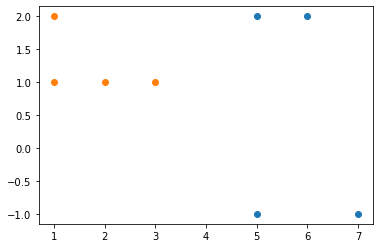

In [37]:
seq_cluster_result = sequential_clustering(points,4)
print(seq_cluster_result)
for i,k in enumerate(seq_cluster_result):
    x = seq_cluster_result[k][:,0]
    y = seq_cluster_result[k][:,1]
    plt.scatter(x,y)
plt.show()

In [38]:
def k_means(points,K):
    seed = random.sample(range(1,points.shape[0]),K)
    cluster_center = np.array([points[seed[0]]])
    cluster_dic = {}
    old_cluster = {}
    flag = 0
    for i in range(1,K):
        cluster_center = np.row_stack((cluster_center,points[seed[i]]))
        #cluster_dic[i] = [points[seed[i]]]
    while 1:
        for i in range(points.shape[0]):
            min_dis = MAX_NUM
            label = 0
            for j in range(cluster_center.shape[0]):
                distance = Euclidean_distance(cluster_center[j],points[i])
                if distance < min_dis:
                    min_dis = distance
                    label = j
            if label not in cluster_dic.keys():
                cluster_dic[label] = np.array([points[i]])
            else:
                cluster_dic[label] = np.row_stack((cluster_dic[label],points[i]))
            if any(cluster_center[label] != np.average(cluster_dic[label],axis=0)):
                flag = 1
            cluster_center[label] = np.average(cluster_dic[label],axis=0)
        #print(cluster_dic==old_cluster)
        if flag == 1:
            break
        else:
            old_cluster = cluster_dic
            cluster_dic = {}
    return cluster_dic

{1: array([[ 5,  2],
       [ 6,  2],
       [ 7, -1],
       [ 5, -1]]), 0: array([[1, 2],
       [2, 1],
       [1, 1],
       [3, 1]])}


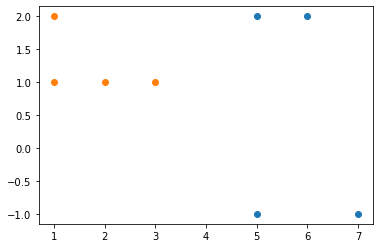

In [39]:
kmeans_result = k_means(points,2)
print(kmeans_result)
for i,k in enumerate(kmeans_result):
    x = kmeans_result[k][:,0]
    y = kmeans_result[k][:,1]
    plt.scatter(x,y)
plt.show()

In [40]:
def hierarchical_cluster(points,num):
    cluster_dic = {}
    num_of_cluster = points.shape[0]
    cluster_center = {}
    for i in range(points.shape[0]):
        cluster_dic[i] = np.array([points[i]])
        cluster_center[i] = points[i]
    while num_of_cluster > num:
        min_dis = MAX_NUM
        for i,k1 in enumerate(cluster_center):
            for j,k2 in enumerate(cluster_center):
                if i < j:
                    #print(cluster_center)
                    dis = Euclidean_distance(cluster_center[k1],cluster_center[k2])
                    if dis < min_dis:
                        merge_label = [k1,k2]
                        min_dis = dis
        #print(cluster_center)
        #print(merge_label)
        cluster_dic[merge_label[0]] = np.row_stack((cluster_dic[merge_label[0]],cluster_dic.pop(merge_label[1])))
        num_of_cluster = num_of_cluster-1
        cluster_center = {}
        for i,k in enumerate(cluster_dic):
            cluster_center[k] = np.average(cluster_dic[k],axis=0)
        
    return cluster_dic

    

{0: array([[ 5,  2],
       [ 6,  2],
       [ 7, -1],
       [ 5, -1]]), 1: array([[1, 2],
       [1, 1],
       [2, 1],
       [3, 1]])}


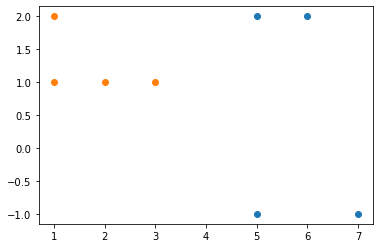

In [41]:
hierarchical_cluster_result = hierarchical_cluster(points,2)
print(hierarchical_cluster_result)
for i,k in enumerate(hierarchical_cluster_result):
    x = hierarchical_cluster_result[k][:,0]
    y = hierarchical_cluster_result[k][:,1]
    plt.scatter(x,y)
plt.show()

In [57]:
print(Euclidean_distance(np.array([1,1]),np.array([2,2])))

1.4142135623730951


In [66]:
def dunn(cluster_dic):
    max_diam = 0
    min_dis = MAX_NUM
    for i,k1 in enumerate(cluster_dic):
        diam = 0
        for a in range(cluster_dic[i].shape[0]):
            for b in range(cluster_dic[i].shape[0]):
                if a > b:
                    d = Euclidean_distance(cluster_dic[i][a],cluster_dic[i][b])
                    if d > diam:
                        diam = d
        if diam > max_diam:
            max_diam = diam
        for j,k2 in enumerate(cluster_dic):
            if i > j:
                dis = MAX_NUM
                for a in range(cluster_dic[i].shape[0]):
                    for b in range(cluster_dic[j].shape[0]):
                        d = Euclidean_distance(cluster_dic[i][a],cluster_dic[j][b])
                        if d < dis:
                            dis = d
                if dis < min_dis:
                    min_dis = dis
    #print(min_dis, max_diam)
    return min_dis/max_diam

def Davies_Bouldin(cluster_dic):
    dispertion_within = np.zeros(len(cluster_dic))
    max_similarity = np.zeros(len(cluster_dic))
    indice = 0
    for i,k in enumerate(cluster_dic):
        d = 0
        cluster_center = np.average(cluster_dic[k],axis=0)
        for a in range(cluster_dic[k].shape[0]):
            d = d+Euclidean_distance(cluster_dic[k][a],cluster_center)**2
        #print(cluster_center,d)
        dispertion_within[i] = (d/cluster_dic[k].shape[0])**0.5
    for i,k1 in enumerate(cluster_dic):
        for j,k2 in enumerate(cluster_dic):
            if i != j:
                cluster_center1 = np.average(cluster_dic[k1],axis=0)
                cluster_center2 = np.average(cluster_dic[k2],axis=0)
                dispertion_between = Euclidean_distance(cluster_center1,cluster_center2)
                similarity = (dispertion_within[i]+dispertion_within[j])/dispertion_between
                #print(max_similarity,cluster_center1,cluster_center2)
                if similarity > max_similarity[i]:
                    max_similarity[i] = similarity
    #print(dispertion_within)
    #print(max_similarity)
    return np.average(max_similarity)

In [67]:
print("sequential cluster:\ndunn:{0},Davies_Bouldin:{1}".format(dunn(seq_cluster_result),Davies_Bouldin(seq_cluster_result)))
print("hierarchy cluster:\ndunn:{0},Davies_Bouldin:{1}".format(dunn(hierarchical_cluster_result),Davies_Bouldin(hierarchical_cluster_result)))
print("k-means:\ndunn:{0},Davies_Bouldin:{1}".format(dunn(kmeans_result),Davies_Bouldin(kmeans_result)))

sequential cluster:
dunn:0.6201736729460423,Davies_Bouldin:0.6509877005287489
hierarchy cluster:
dunn:0.6201736729460423,Davies_Bouldin:0.6509877005287489
k-means:
dunn:0.6201736729460423,Davies_Bouldin:0.6509877005287489


![quiz](\assets\Snipaste_2022-09-25_12-29-42.jpg)

In [44]:
u1 = [-1,-1]
sigma1 = [[1,0.5],[0.5,1]]
u2 = [6,2]
sigma2 = [[1,0],[0,1]]
u3 = [0.5,7]
sigma3 = [[1,-0.5],[-0.5,1]]
points = np.random.multivariate_normal(u1,sigma1,200)
points = np.row_stack((points,np.random.multivariate_normal(u2,sigma2,200)))
points = np.row_stack((points,np.random.multivariate_normal(u3,sigma3,200)))

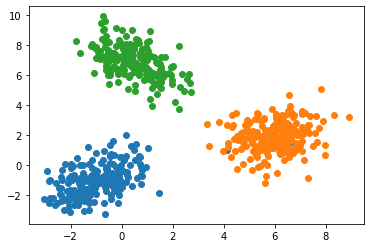

In [53]:
cluster_result = k_means(points,3)
#print(cluster_result)
for i,k in enumerate(cluster_result):
    x = cluster_result[k][:,0]
    y = cluster_result[k][:,1]
    plt.scatter(x,y)
plt.show()

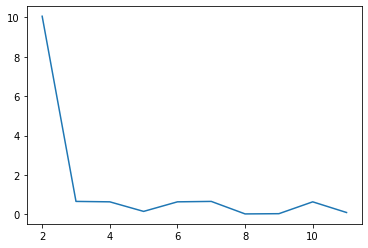

In [54]:
J = np.zeros(10)
for j in range(2,12):
    cluster_result = k_means(points,j)
    for i,k in enumerate(cluster_result):
        d = 0
        cluster_center = np.average(cluster_result[k],axis=0)
        for a in range(cluster_result[k].shape[0]):
            d = d+Euclidean_distance(cluster_result[k][a],cluster_center)**2
    J[j-2] = d/600
plt.plot(range(2,12),J)
plt.show()

由上图，根据类内距离原则应选择K为3